# Pandas 1

In [1]:
import numpy as np
import pandas as pd

## Problem 1

In [2]:
n=np.arange(0,51,2)
s=(n**2-1)
series1=pd.Series(s, index=n)
series1[np.array([i%3==0 for i in series1.index])]=0
series1

0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
50    2499
dtype: int32

## Problem 2

In [3]:
def myfun2(p,d=100):
    index=pd.date_range("1/1/2000", "31/12/2000", freq='D')
    stock=np.zeros((len(index)))
    ud=np.random.binomial(size=len(index), n=1,p=p)
    for ii in range(len(index)):
        if ud[ii]==0:
            ud[ii]=-1
        stock[0]=d
        stock[ii]=stock[ii-1]+ud[ii]
    series2=pd.Series(stock, index=index)
    series2.plot()
    return

In [4]:
myfun2(0.51,d=100)

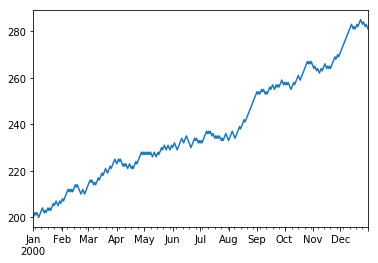

In [5]:
myfun2(0.6,d=200)

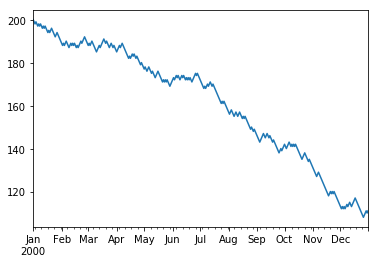

In [6]:
myfun2(0.4,d=200)

## Problem 3

In [7]:
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age,'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

In [8]:
studentInfo[studentInfo['Age']>19&studentInfo['Sex'].isin(['M'])][['ID', 'Name']]

,ID,Name
0,0,Mylan
1,1,Regan
2,2,Justin
3,3,Jess
4,4,Jason
5,5,Remi
6,6,Matt
7,7,Alexander
8,8,JeanMarie


## Problem 4

In [9]:
DataFrame=pd.merge(studentInfo[studentInfo['Sex']=='M'],otherInfo,on=['ID'])[['ID','Age','GPA']]

In [10]:
DataFrame

,ID,Age,GPA
0,0,20,3.8
1,2,18,3.0
2,4,19,2.8
3,6,20,3.8
4,7,19,3.4


# Pandas 2

## Problem 1

In [11]:
from matplotlib import pyplot as plt
from pydataset import data

In [12]:
titanic = pd.read_csv("titanic.csv")

In [13]:
titanic.tail()

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


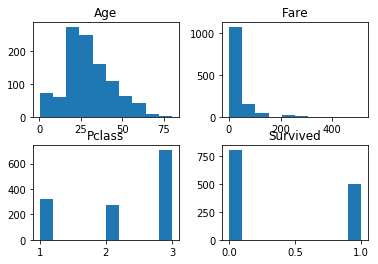

In [14]:
titanic[["Pclass","Survived","Age","Fare"]].hist(grid=False, bins=10);

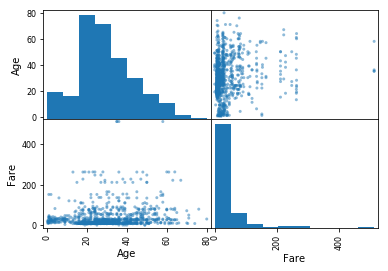

In [15]:
pd.plotting.scatter_matrix(titanic[["Age", "Fare"]]);

In [16]:
lung=data("lung")
lung.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


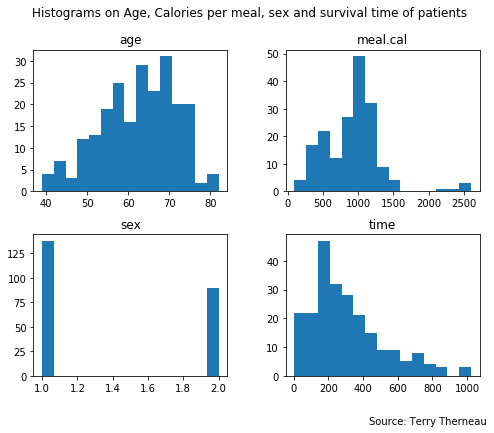

In [17]:
axes=lung[["age","time","meal.cal","sex"]].hist(grid=False, bins=15,figsize=(8, 6));
plt.suptitle("Histograms on Age, Calories per meal, sex and survival time of patients");
plt.annotate("Source: Terry Therneau",(0.43,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top');
plt.show();

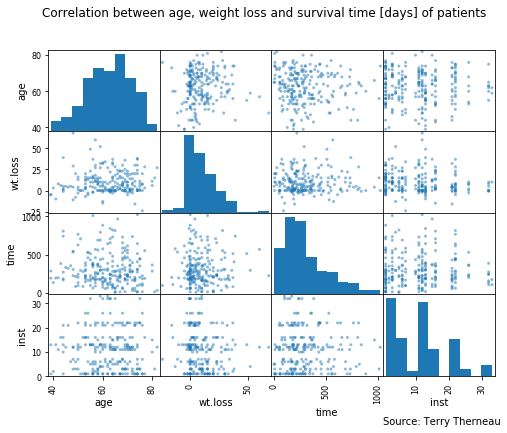

In [18]:
pd.plotting.scatter_matrix(lung[["age", "wt.loss","time", "inst"]], figsize=(8,6));
plt.suptitle("Correlation between age, weight loss and survival time [days] of patients");
plt.annotate("Source: Terry Therneau",(0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top');
plt.show();

In [19]:
mfb=data("Arbuthnot")
mfb.head()

,Year,Males,Females,Plague,Mortality,Ratio,Total
1,1629,5218,4683,0,8771,1.114243,9.901
2,1630,4858,4457,1317,10554,1.089971,9.315
3,1631,4422,4102,274,8562,1.078011,8.524
4,1632,4994,4590,8,9535,1.088017,9.584
5,1633,5158,4839,0,8393,1.065923,9.997


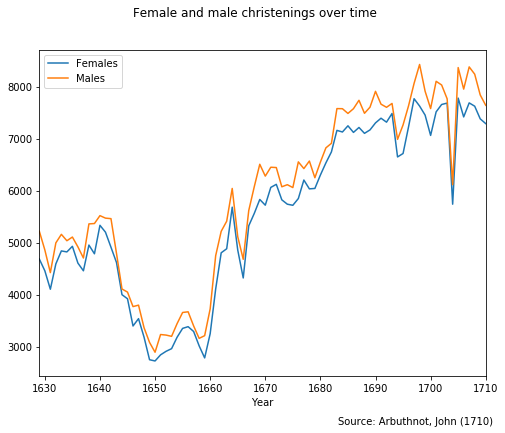

In [20]:
mfb.plot(kind="line", x="Year", y=["Females","Males"], figsize=(8,6));
plt.suptitle("Female and male christenings over time");
plt.annotate("Source: Arbuthnot, John (1710)" ,(0.67,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top');
plt.show();

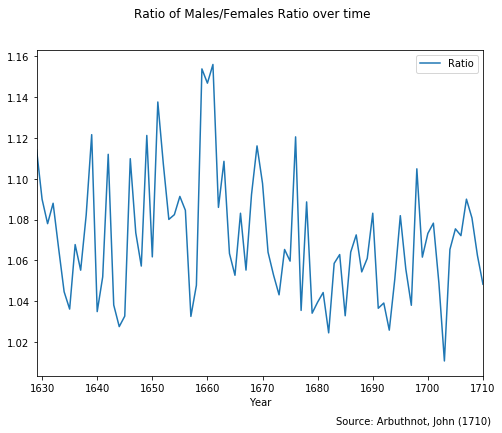

In [21]:
mfb.plot(kind="line", x="Year", y="Ratio", figsize=(8,6));
plt.suptitle("Ratio of Males/Females Ratio over time");
plt.annotate("Source: Arbuthnot, John (1710)" ,(0.67,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top');
plt.show();

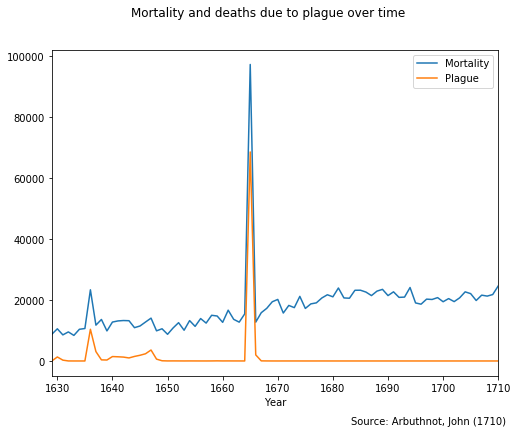

In [22]:
mfb.plot(kind="line", x="Year", y=["Mortality", "Plague"], figsize=(8,6));
plt.suptitle("Mortality and deaths due to plague over time");
plt.annotate("Source: Arbuthnot, John (1710)" ,(0.67,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top');
plt.show();

# Pandas 3

## Problem 1
### Iris

In [23]:
iris =data("iris")
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [24]:
species = iris.groupby("Species")
list(species.groups)

['setosa', 'versicolor', 'virginica']

In [25]:
species.mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


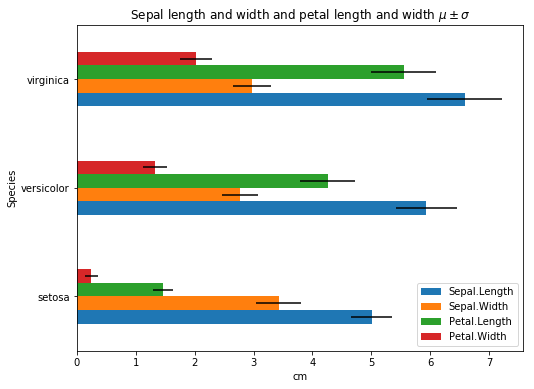

In [26]:
species[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]].mean().plot(kind="barh",xerr=species.std(), figsize=(8,6) ,title="Sepal length and width and petal length and width $\mu\pm\sigma$");
plt.xlabel("cm");
plt.show();

1) I personally think the species "setosa" is the easiest one to distinguish from the other classes. Looking at the sepal/petal length and width patterns reveals that especially the ratio between sepal width and petal length is reverse for the setosa species. Furthermore, on average, the sepal length to petal width ratio for setosa should be the biggest.

2) One could use the dataset with the labels as a training dataset and build a model with machine learning. Then using the data without labels, one could try to make predictions. (Note: this would still require more data with labels to build a reliable model).

### Poisons

In [27]:
poisons =data("poisons")
poisons.head()

,time,poison,treat
1,0.31,1,A
2,0.45,1,A
3,0.46,1,A
4,0.43,1,A
5,0.36,2,A


In [28]:
poisontype = poisons.groupby("poison")
treatmenttype = poisons.groupby("treat")
poisontype.describe()

time                                                      
       count      mean       std   min     25%    50%    75%   max
poison                                                            
1       16.0  0.617500  0.209428  0.31  0.4500  0.625  0.730  1.10
2       16.0  0.544375  0.289366  0.23  0.3575  0.420  0.635  1.24
3       16.0  0.276250  0.062276  0.18  0.2275  0.270  0.315  0.38

1) Type 3 in general (on average) has the shortest survival time, hence, is the deadliest

In [29]:
treatmenttype.describe()

time                                                        poison  \
      count      mean       std   min     25%    50%     75%   max  count   
treat                                                                       
A      12.0  0.314167  0.102288  0.18  0.2275  0.300  0.4075  0.46   12.0   
B      12.0  0.676667  0.320832  0.29  0.3775  0.665  0.8900  1.24   12.0   
C      12.0  0.392500  0.167013  0.22  0.2475  0.375  0.4425  0.76   12.0   
D      12.0  0.534167  0.219440  0.30  0.3525  0.505  0.6725  1.02   12.0   

                                               
      mean       std  min  25%  50%  75%  max  
treat                                          
A      2.0  0.852803  1.0  1.0  2.0  3.0  3.0  
B      2.0  0.852803  1.0  1.0  2.0  3.0  3.0  
C      2.0  0.852803  1.0  1.0  2.0  3.0  3.0  
D      2.0  0.852803  1.0  1.0  2.0  3.0  3.0

1) On average, treatment B is the most effective one.

In [30]:
decision = poisons.groupby(["poison","treat"])
decision.describe()

time                                                     
             count    mean       std   min     25%    50%     75%   max
poison treat                                                           
1      A       4.0  0.4125  0.069462  0.31  0.4000  0.440  0.4525  0.46
       B       4.0  0.8800  0.160831  0.72  0.7950  0.850  0.9350  1.10
       C       4.0  0.5675  0.156711  0.43  0.4450  0.540  0.6625  0.76
       D       4.0  0.6100  0.112842  0.45  0.5775  0.640  0.6725  0.71
2      A       4.0  0.3200  0.075277  0.23  0.2750  0.325  0.3700  0.40
       B       4.0  0.8150  0.336303  0.49  0.5800  0.765  1.0000  1.24
       C       4.0  0.3750  0.056862  0.31  0.3400  0.375  0.4100  0.44
       D       4.0  0.6675  0.270970  0.38  0.5150  0.635  0.7875  1.02
3      A       4.0  0.2100  0.021602  0.18  0.2025  0.215  0.2225  0.23
       B       4.0  0.3350  0.046547  0.29  0.2975  0.335  0.3725  0.38
       C       4.0  0.2350  0.012910  0.22  0.2275  0.235  0.2425  0.25
       D       4.0  0.3250  0.026458  0.30  0.3075  0.320  0.3375  0.36

2) If I was poisoned without knowing the poison type I most likely would go for the treatment B, even if the std is rather high.

If I knew which poison I was poisoned with, I would still choose treatment B since it seems to be the superior treatment for each poison. 

### Diamonds (are forever)
### 1)

In [33]:
diamonds =data("diamonds")

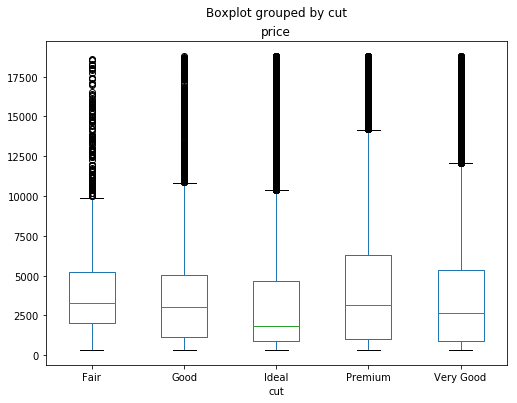

In [34]:
diamonds.boxplot("price", by="cut", grid=False, figsize=(8,6));

In [35]:
bycut = diamonds.groupby("cut")
bycut.mean()

,carat,depth,table,price,x,y,z
cut,,,,,,,
Fair,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801


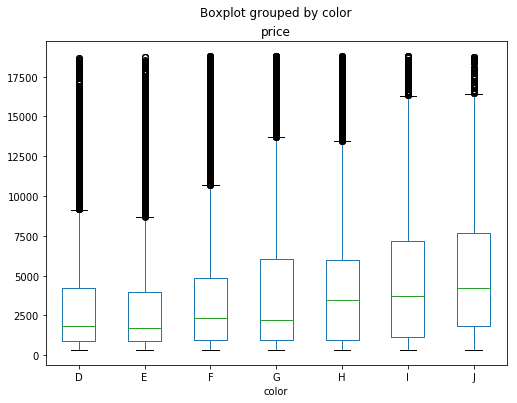

In [36]:
diamonds.boxplot("price", by="color", grid=False, figsize=(8,6));

In [38]:
bycolor = diamonds.groupby("color")
bycolor.mean()

,carat,depth,table,price,x,y,z
color,,,,,,,
D,0.657795,61.698125,57.404590,3169.954096,5.417051,5.421128,3.342827
E,0.657867,61.662090,57.491201,3076.752475,5.411580,5.419029,3.340689
F,0.736538,61.694582,57.433536,3724.886397,5.614961,5.619456,3.464446
G,0.771190,61.757111,57.288629,3999.135671,5.677543,5.680192,3.505021
H,0.911799,61.836850,57.517811,4486.669196,5.983335,5.984815,3.695965
I,1.026927,61.846385,57.577278,5091.874954,6.222826,6.222730,3.845411
J,1.162137,61.887215,57.812393,5323.818020,6.519338,6.518105,4.033251


Cut seems to not influence the price drastically. Colors H-J seem to be more expensive on average (which does not make sense by intuition as according to the data description J is the worst color and D the best). However, neither cut nor colors seem to have significant differences in their prices. Also note that diamonds often vary also in other dimensions than the examined classifications. Hence, it's hard to make a reliable statement because one would need to control for all other dimensions to get to "causal" conclusion.

### 2)

In [39]:
bycolor = diamonds.groupby(["color","cut"]) 
bycolor.mean()

carat      depth      table        price         x  \
color cut                                                                
D     Fair       0.920123  64.048466  58.969325  4291.061350  6.018344   
      Good       0.744517  62.365710  58.541541  3405.382175  5.620076   
      Ideal      0.565766  61.678370  55.965632  2629.094566  5.186704   
      Premium    0.721547  61.169245  58.718964  3631.292576  5.599869   
      Very Good  0.696424  61.750165  58.041309  3470.467284  5.501210   
E     Fair       0.856607  63.319643  59.364732  3682.312500  5.909063   
      Good       0.745134  62.203751  58.779957  3423.644159  5.617889   
      Ideal      0.578401  61.686677  55.967461  2597.550090  5.215762   
      Premium    0.717745  61.175909  58.779461  3538.914420  5.587116   
      Very Good  0.676317  61.730250  58.038875  3214.652083  5.432467   
F     Fair       0.904712  63.508013  59.453205  3827.003205  5.990513   
      Good       0.775930  62.202310  58.910891  3495.750275  5.693443   
      Ideal      0.655829  61.675562  55.924203  3374.939362  5.408751   
      Premium    0.827036  61.259974  58.679279  4324.890176  5.876692   
      Very Good  0.740961  61.721627  57.848429  3778.820240  5.610504   
G     Fair       1.023822  64.339809  58.773248  4239.254777  6.173822   
      Good       0.850896  62.526636  58.471986  4123.482204  5.850264   
      Ideal      0.700715  61.700164  55.902375  3720.706388  5.511214   
      Premium    0.841488  61.279480  58.702360  4500.742134  5.864254   
      Very Good  0.766799  61.841279  57.784428  3872.753806  5.660204   
H     Fair       1.219175  64.585149  58.696370  5135.683168  6.579373   
      Good       0.914729  62.499573  58.611111  4276.254986  5.968789   
      Ideal      0.799525  61.733194  55.965843  3889.334831  5.731377   
      Premium    1.016449  61.322034  58.792034  5216.706780  6.244508   
      Very Good  0.915948  61.968366  57.903015  4535.390351  5.982286   
I     Fair       1.198057  64.220571  59.237143  4685.445714  6.564457   
      Good       1.057222  62.475096  58.773946  5078.532567  6.253544   
      Ideal      0.913029  61.793598  56.021357  4451.970377  5.976197   
      Premium    1.144937  61.328641  58.771849  5946.180672  6.489531   
      Very Good  1.046952  61.934551  58.105150  5255.879568  6.272259   
J     Fair       1.341176  64.357143  58.917647  4975.655462  6.747311   
      Good       1.099544  62.395765  58.813029  4574.172638  6.377003   
      Ideal      1.063594  61.821987  56.012612  4918.186384  6.320045   
      Premium    1.293094  61.390099  58.874752  6294.591584  6.809975   
      Very Good  1.133215  61.902065  58.277729  5103.513274  6.460782   

                        y         z  
color cut                            
D     Fair       5.963190  3.839877  
      Good       5.633897  3.504864  
      Ideal      5.196224  3.201800  
      Premium    5.571472  3.415926  
      Very Good  5.531613  3.405089  
E     Fair       5.858214  3.722143  
      Good       5.632454  3.496066  
      Ideal      5.232214  3.220346  
      Premium    5.558353  3.408875  
      Very Good  5.463213  3.373996  
F     Fair       5.931122  3.787821  
      Good       5.709659  3.544609  
      Ideal      5.422250  3.338732  
      Premium    5.844655  3.588391  
      Very Good  5.642717  3.472902  
G     Fair       6.114076  3.963153  
      Good       5.862824  3.647922  
      Ideal      5.524007  3.403120  
      Premium    5.833345  3.579641  
      Very Good  5.688752  3.509883  
H     Fair       6.497393  4.219373  
      Good       5.974245  3.726937  
      Ideal      5.740446  3.539917  
      Premium    6.228110  3.811699  
      Very Good  6.006272  3.713849  
I     Fair       6.493486  4.193486  
      Good       6.260536  3.901513  
      Ideal      5.989479  3.695270  
      Premium    6.453270  3.963894  
      Very Good  6.299028  3.890972  
J     Fair       6.675882  4.319664  
      Good       6.386026  

Similar to the above comment: For color H fair cuts on average have also way more carat. There is no ceteris paribus statement possible. Controlling for carat & co. would quite surely result in ideal cuts to be more expensive than fair cuts.

## Problem 2

### 1)

In [40]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [41]:
byembarked = titanic.groupby("Embarked") 
byembarked.mean()

,Pclass,Survived,Age,Sibsp,Parch,Fare,Body
Embarked,,,,,,,
C,1.851852,0.555556,32.332154,0.400000,0.370370,62.336267,162.000000
Q,2.894309,0.357724,28.630000,0.341463,0.113821,12.409012,175.142857
S,2.347921,0.332604,29.245205,0.550328,0.426696,27.418824,159.348315


On average, people that embarked from "C" had the highest survival rate. However, once more, they also differ in other dimensions (Pclass, Age for example)

### 2)

In [56]:
titanic2 = titanic[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]]
titanic2["Age"].fillna(titanic2["Age"].mean(), inplace=True)
titanic2.dropna(inplace=True)
titanic2.pivot_table(values=["Survived"], index=["Embarked","Sex"])

Survived
Embarked Sex             
C        female  0.902655
         male    0.305732
Q        female  0.616667
         male    0.111111
S        female  0.680412
         male    0.170418

It still seems like people that embarked from "C" had a higher survival rate than all others. However, It is clearly visible that women where rescued first, while survival chances for men stayed very low.

### 3)

In [58]:
pd.cut([6, 1, 2, 3, 4, 5, 6, 7], [0, 4, 8])
age = pd.cut(titanic2['Age'], [0, 12, 18, 80])
titanic2.pivot_table(values="Survived", index=["Embarked", "Pclass"],columns="Sex", aggfunc="mean")

Sex                female      male
Embarked Pclass                    
C        1.0     0.971831  0.400000
         2.0     1.000000  0.294118
         3.0     0.709677  0.214286
Q        1.0     1.000000  0.000000
         2.0     1.000000  0.000000
         3.0     0.589286  0.122807
S        1.0     0.956522  0.305556
         2.0     0.870968  0.134228
         3.0     0.395349  0.145205

In [59]:
titanic2.pivot_table(values="Survived", index=["Embarked", "Pclass"],columns="Sex", aggfunc="sum")

Sex              female  male
Embarked Pclass              
C        1.0       69.0  28.0
         2.0       11.0   5.0
         3.0       22.0  15.0
Q        1.0        2.0   0.0
         2.0        2.0   0.0
         3.0       33.0   7.0
S        1.0       66.0  33.0
         2.0       81.0  20.0
         3.0       51.0  53.0

People who embarked from "C" had a large share of Pclass 1 travellers and a lot of women, which both clearly increased survival chances.

# Pandas 4
## Problem 1

In [45]:
from datetime import datetime
from pandas import Series

In [46]:
missing_values= ["n/a", "na", "."]
djia= pd.read_csv("DJIA.csv", na_values = missing_values, index_col=0).dropna()
djia['VALUE']= djia['VALUE'].astype(float)
djia= djia.set_index(pd.to_datetime(djia.index))

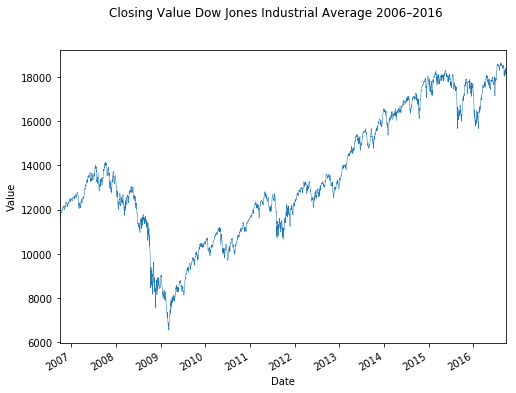

In [47]:
djia.plot(y='VALUE', lw=.5,figsize=(8,6)).get_legend().remove();
plt.suptitle("Closing Value Dow Jones Industrial Average 2006–2016");
plt.ylabel("Value");
plt.xlabel("Date");
plt.show();

## Problem 2

In [48]:
pc= pd.read_csv("paychecks.csv", header=None)
ind1= pd.date_range(start='3/13/2008', periods=93, freq="WOM-1FRI") 
ind2= pd.date_range(start='3/13/2008', periods=93, freq="WOM-3FRI") 
index = pd.DatetimeIndex.union(ind1, ind2)[0:93]
pc=pc.set_index(index)

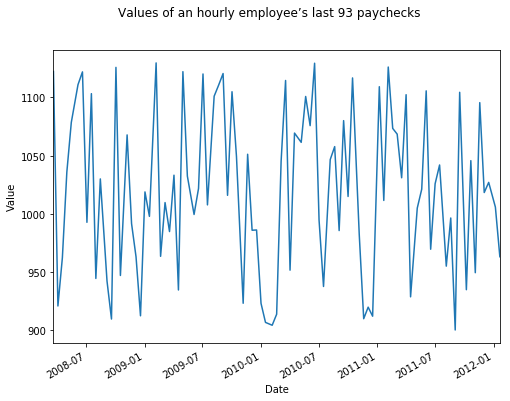

In [49]:
pc.plot(y=0,figsize=(8,6)).get_legend().remove();
plt.suptitle("Values of an hourly employee’s last 93 paychecks");
plt.ylabel("Value");
plt.xlabel("Date");
plt.show();

## Problem 5

In [50]:
diffD=djia['VALUE'] - djia['VALUE'].shift(1)
diffD=diffD.dropna()
maxGainD= np.max(diffD);
maxLossD= np.min(diffD);
dateGainD= diffD.sort_values().index[-1]
dateLossD= diffD.sort_values().index[0]
print("The day with the biggest gain was: "+str(dateGainD)+" the gain was: "+str(maxGainD))
print("The day with the biggest loss was: "+str(dateLossD)+" the loss was: "+str(maxLossD))

djiaM = djia.resample('M').first()
diffM=djiaM['VALUE'] - djiaM['VALUE'].shift(1)
diffM=diffM.dropna()
maxGainM= np.max(diffM);
maxLossM= np.min(diffM);
dateGainM= diffM.sort_values().index[-1]
dateLossM= diffM.sort_values().index[0]
print("The month with the biggest gain was: "+str(dateGainM)+" the gain was: "+str(maxGainM))
print("The month with the biggest loss was: "+str(dateLossM)+" the loss was: "+str(maxLossM))

The day with the biggest gain was: 2008-10-13 00:00:00 the gain was: 936.4200000000001
The day with the biggest loss was: 2008-09-29 00:00:00 the loss was: -777.6799999999985
The month with the biggest gain was: 2015-11-30 00:00:00 the gain was: 1556.7499999999982
The month with the biggest loss was: 2015-09-30 00:00:00 the loss was: -1539.8500000000004


## Problem 6

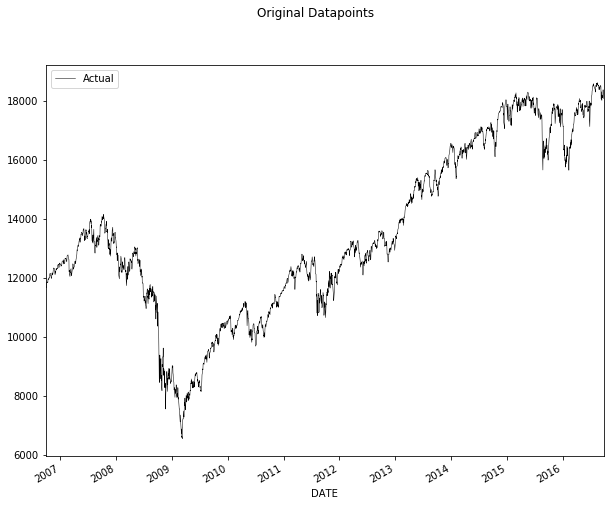

In [51]:
djia.plot(color="black", lw=.5, figsize=(10,8));
plt.legend(["Actual"])
plt.suptitle("Original Datapoints");

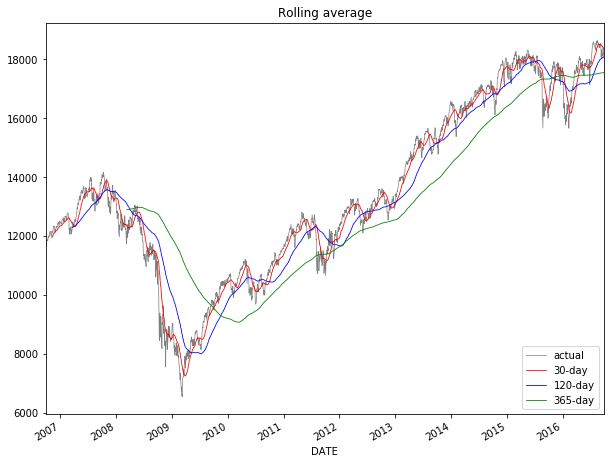

In [52]:
ax1= plt.subplot(111)
djia.plot(color="gray", lw=0.7, ax=ax1, figsize=(10,8))
djia.rolling(window=30).mean().plot(color='r', lw=0.8, ax=ax1,figsize=(10,8))
djia.rolling(window=120).mean().plot(color='b', lw=0.8, ax=ax1,figsize=(10,8))
djia.rolling(window=365).mean().plot(color='green', lw=0.8, ax=ax1,figsize=(10,8))
ax1.legend(["actual","30-day", "120-day","365-day"], loc="lower right")
ax1.set_title("Rolling average");

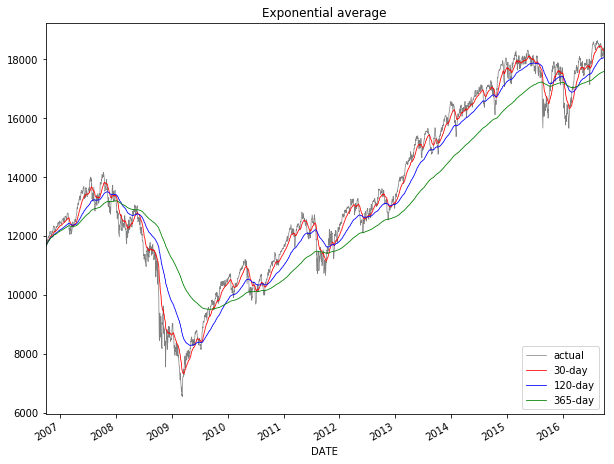

In [53]:
ax1= plt.subplot(111)
djia.plot(color="gray", lw=0.7, ax=ax1, figsize=(10,8))
djia.ewm(span=30).mean().plot(color='r', lw=0.8, ax=ax1,figsize=(10,8))
djia.ewm(span=120).mean().plot(color='b', lw=0.8, ax=ax1, figsize=(10,8))
djia.ewm(span=365).mean().plot(color='green', lw=0.8, ax=ax1,figsize=(10,8))
ax1.legend(["actual","30-day", "120-day","365-day"], loc="lower right")
ax1.set_title("Exponential average");

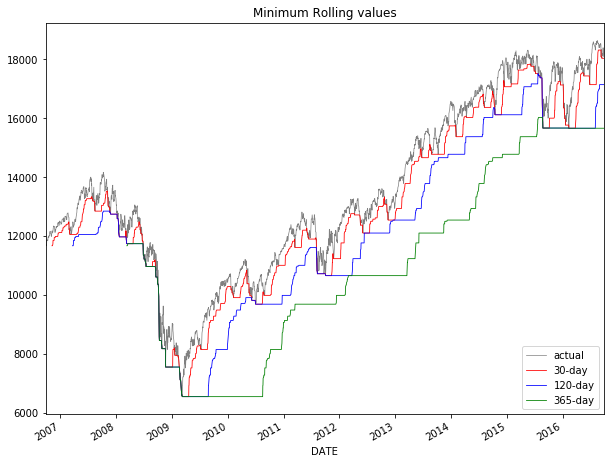

In [54]:
ax1= plt.subplot(111)
djia.plot(color="gray", lw=0.7, ax=ax1, figsize=(10,8))
djia.rolling(window=30).min().plot(color='r', lw=0.8, ax=ax1,figsize=(10,8))
djia.rolling(window=120).min().plot(color='b', lw=0.8, ax=ax1,figsize=(10,8))
djia.rolling(window=365).min().plot(color='green', lw=0.8, ax=ax1,figsize=(10,8))
ax1.legend(["actual","30-day", "120-day","365-day"], loc="lower right")
ax1.set_title("Minimum Rolling values");

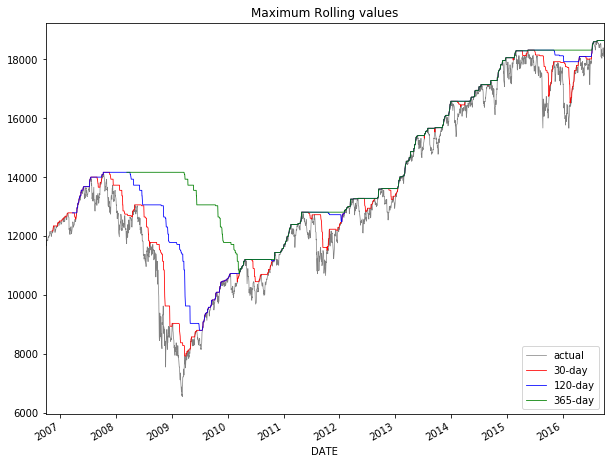

In [55]:
ax1= plt.subplot(111)
djia.plot(color="gray", lw=0.7, ax=ax1, figsize=(10,8))
djia.rolling(window=30).max().plot(color='r', lw=0.8, ax=ax1,figsize=(10,8))
djia.rolling(window=120).max().plot(color='b', lw=0.8, ax=ax1,figsize=(10,8))
djia.rolling(window=365).max().plot(color='green', lw=0.8, ax=ax1,figsize=(10,8))
ax1.legend(["actual","30-day", "120-day","365-day"], loc="lower right")
ax1.set_title("Maximum Rolling values");

With an increasing window-length, the series gets smoother and smoother -> rather indicating the trend of the Index than the actual price changes.